In [1]:
import ktrain
from ktrain import text
import pandas as pd
from pandas import DataFrame

In [3]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_csv('disagreement_single_BERT_balanced_2.csv',
                      label_columns = ["label"],
                      text_column = "text",
                      preprocess_mode='bert',
                      ngram_range=1,
                      val_pct=0.1,
                      val_filepath=None,
                      maxlen=256)

detected encoding: utf-8 (if wrong, set manually)
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [4]:
learner = ktrain.get_learner(text.text_classifier('bert', (x_train, y_train), preproc=preproc, metrics = ['accuracy','AUC']),
                             train_data=(x_train, y_train),
                             val_data=(x_test, y_test),
                             batch_size=12)

Is Multi-Label? False
maxlen is 256
done.


simulating training for different learning rates... this may take a few moments...
Train on 606 samples
Epoch 1/5
606/606 [==============================] - 110s 181ms/sample - loss: 0.7042 - accuracy: 0.5314 - AUC: 0.5759
Epoch 2/5
606/606 [==============================] - 71s 116ms/sample - loss: 0.6265 - accuracy: 0.6667 - AUC: 0.7140
Epoch 3/5
606/606 [==============================] - 70s 115ms/sample - loss: 0.7645 - accuracy: 0.5743 - AUC: 0.6368
Epoch 4/5
396/606 [==================>...........] - ETA: 23s - loss: 3.4823 - accuracy: 0.5076 - AUC: 0.5031

done.
Visually inspect loss plot and select learning rate associated with falling loss


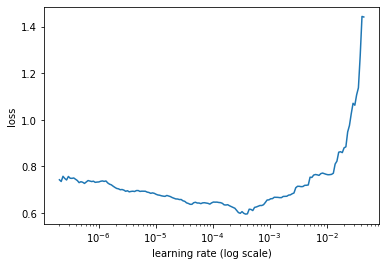

In [5]:
learner.lr_find(show_plot=True, max_epochs=5)

In [6]:
learner.autofit(2e-5)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 2e-05...
Train on 606 samples, validate on 68 samples
Epoch 1/1024
606/606 [==============================] - 76s 126ms/sample - loss: 0.6165 - accuracy: 0.6568 - AUC: 0.7234 - val_loss: 0.4634 - val_accuracy: 0.7647 - val_AUC: 0.8868
Epoch 2/1024
606/606 [==============================] - 73s 121ms/sample - loss: 0.4310 - accuracy: 0.8102 - AUC: 0.8922 - val_loss: 0.4208 - val_accuracy: 0.7794 - val_AUC: 0.8945
Epoch 3/1024
606/606 [==============================] - 72s 119ms/sample - loss: 0.3075 - accuracy: 0.8960 - AUC: 0.9425 - val_loss: 0.6617 - val_accuracy: 0.7794 - val_AUC: 0.7889
Epoch 4/1024
600/606 [============================>.] - ETA: 0s - loss: 0.1608 - accuracy: 0.9583 - AUC: 0.9866
Epoch 00004: Reducing Max LR on Plateau: new max lr will be 1e-05 (if not early_stopping).
606/606 [================

In [7]:
learner.validate(val_data=(x_test, y_test))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.77      0.83      0.80        36

    accuracy                           0.78        68
   macro avg       0.78      0.78      0.78        68
weighted avg       0.78      0.78      0.78        68



array([[23,  9],
       [ 6, 30]])

In [ ]:
learner.model.save('models_sigstaff')

In [ ]:
learner.model.save_weights('models_sigstaff')

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
db = pd.read_csv('data_forBERT_clean.csv', header=0)

In [ ]:
predictions = predictor.predict(db.text.tolist())

In [ ]:
predictions_list = DataFrame(predictions, columns=['label'])

In [ ]:
predictions_list.to_csv("sigstaff_preds.csv")